# Information for different values of Kon and Koff (using kinetic monte carlo)

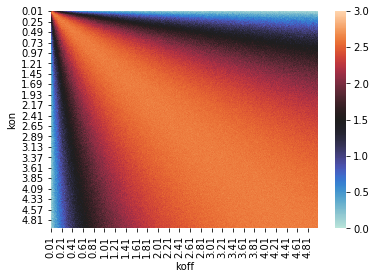

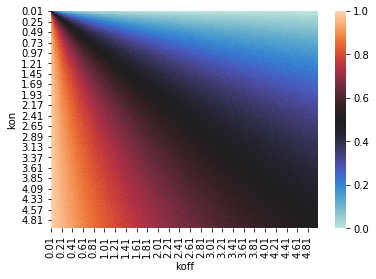

In [2]:
#avg rate of modification vs kon/koff
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
def mon(n,kon,koff):
    #i = int(input("Enter the number of nucleosomes = "))
    i = 3
    x_array = np.zeros((n,i))
    t_array = np.zeros(n)
    t = 0
    mi = 0
    kon_list = []
    koff_list = []
    inf_list = []
    l = []
    for y in range(n):
        for z in range(i):
            a = 1/(kon+koff)
            pa = kon*a
            pb = koff*a
            r1 = random.uniform(0,1)
            if r1<pa:
                mz = 1
            else:
                mz = 0
            
            x_array[y,z] = mz
             
    r2 = random.uniform(0,1)
    dt = (-1)*a*math.log(r2)
    t = t + dt
                    
    t_array[y] = t
                    
    x1 = x_array[:,0].tolist()
    x2 = x_array[:,1].tolist()
    x3 = x_array[:,2].tolist()
    p11 = sum(x1)/n
    p22 = sum(x2)/n
    p33 = sum(x3)/n
    pl = [p11,p22,p33]
    nl = [1,2,3]
    #print(x1,x2,x3)
    s1 = 0;s2 = 0; s3 = 0; s4 = 0; s5 = 0; s6 = 0; s7 = 0; s0 = 0
    for i in range(n):
        if x1[i]==1 and x2[i]==0 and x3[i]==0:
            s1 +=1
        else:
            s1 +=0
            
        if x2[i] == 1 and x1[i]==0 and x3[i]==0:
            s2 +=1
        else:
            s2 +=0
            
        if x3[i]==1 and x1[i]==0 and x2[i]==0:
            s3 +=1
        else:
            s3 +=0
            
            if x1[i]==0 and x2[i]==0 and x3[i]==0:
                s0 += 1
            else:
                s0 += 0
            
            if x1[i]==1 and x2[i]==1 and x3[i]==0:
                s4 += 1
            else:
                s4 += 0
                        
            if x1[i]==0 and x2[i]==1 and x3[i]==1:
                s5 += 1
            else:
                s5 += 0
            
            if x1[i]==1 and x2[i]==0 and x3[i]==1:
                s6 += 1
            else:
                s6 += 0
            
            if x1[i]==1 and x2[i]==1 and x3[i]==1:
                s7 += 1
            else:
                s7 += 0
        
        #print(s0,s1,s2,s3,s4,s5,s6,s7,s0)
        p0 = s0/n; p1= s1/n; p2 = s2/n; p3 = s3/n; p4 = s4/n; p5 = s5/n; p6 = s5/n; p6 = s6/n; p7 = s7/n
        total = p0+p1+p2+p3+p4+p5+p6+p7
        
        #print('probablity for 8 microstates are : p0 =',p0,'p1 =',p1,'p2 =',p2,'p3 =',p3,'p4 =',p4,'p5 =',p5,'p6 =',p6,'p7 =',p7)
        in0 = 0; in1 = 0; in2 = 0; in3 = 0; in4 = 0; in5 = 0; in6 = 0; in7 = 0
        
        if p0 == 0:
            in0 = 0
        else:
            in0 = (p0*math.log2(p0))
                        
        if p1 == 0:
            in1 = 0
        else:
            in1 = (p1*math.log2(p1))
                            
                
        if p2 ==0:
            in2 = 0
        else:
            in3 = (p2*math.log2(p2))
                            
        if p3 ==0:
            in3 = 0
        else:
            in3 = (p3*math.log2(p3))
                        
        if p4==0:
            in4 = 0
        else:
            in4 = (p4*math.log2(p4))
        
        if p5==0:
            in5 =0
        else:
            in5 = (p5*math.log2(p5))
                            
        if p6==0:
            in6 =0
        else:
            in6 = (p6*math.log2(p6))
                            
        if p7 ==0:
            in7 = 0
        else:
            in7 = (p7*math.log2(p7))
        
        
        inf = -(in0+in1+in2+in3+in4+in5+in6+in7)
          
    nc = np.count_nonzero(x_array== 1, axis=1)
    #print(nc)
    clist = nc.tolist()
    avr = sum(clist)/(n*3)
    return(kon,koff,inf,avr)

a_list = []   
a2_list = []
i_list = []
m_list = []
r_list = []
r2_list = []
for kon in np.arange(0.01,5.01,0.01):
    for koff in np.arange(0.01,5.01,0.01):
        on,off,i,a = mon(1000,kon,koff)
        a_list.append(on)
        i_list.append(i)
        r_list.append(off)
        m_list.append(a)
for i in a_list:
    a2 = round(i,2)
    a2_list.append(a2)
for i in r_list:
    r2 = round(i,2)
    r2_list.append(r2)
    
c = i_list
data = pd.DataFrame({'kon': a2_list, 'koff': r2_list, 'information': c, 'Average modification': m_list})
data_pivoted = data.pivot("kon", "koff", "information")
sns.heatmap(data_pivoted,vmin = 0, vmax = 3, center = 1.5)
plt.show()

df_pivoted = data.pivot("kon","koff","Average modification")
sns.heatmap(df_pivoted,vmin = 0, vmax = 1, center = 0.5)
plt.show()